# Try to fix strange negative influence of glaciers on dMn

2002 

June, 2019

In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import datetime
from pylab import *
import matplotlib
import warnings
import pickle
warnings.filterwarnings("ignore")

%matplotlib notebook

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
base      = '/data/brogalla/run_storage/riv_base-b-2002_2019-06-04T123157.599939-0400/'
enhanced  = '/data/brogalla/run_storage/riv_2a-b-2002/'
monthly_diff = 'ANHA12_EXH006_2002_monthly_diff.nc'
monthly_ave  = 'ANHA12_EXH006_2002_monthly.nc'

Mask land values

In [11]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
tmask = tmask[0,:,1480:2050,200:800]
tmask_full_ave     = np.zeros((2, 50, 570, 600))
tmask_full_ave[:]  = tmask
tmask_full_diff    = np.zeros((11, 50, 570, 600))
tmask_full_diff[:] = tmask

In [12]:
def load_monthly(storage, diff=monthly_diff, ave=monthly_ave, \
                 mask_ave=tmask_full_ave, mask_diff=tmask_full_diff):
    
    test_ave  = nc.Dataset(storage+ave)
    
    dmn_ave   = np.array(test_ave.variables['dissolmn'])
    
    #apply land mask:
    cond_ave  = (mask_ave  < 0.1) 
    dmn_mave  = np.ma.masked_where(cond_ave, dmn_ave[:,0,:,:,:]) 
    
    return dmn_mave

In [13]:
base_ave = load_monthly(base)
enhanced_ave = load_monthly(enhanced)

Load the lons, lats, etc.

In [14]:
ref   = nc.Dataset('/data/brogalla/run_storage/mn_test1f/'+monthly_ave)
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

Load map projection

<IPython.core.display.Javascript object>


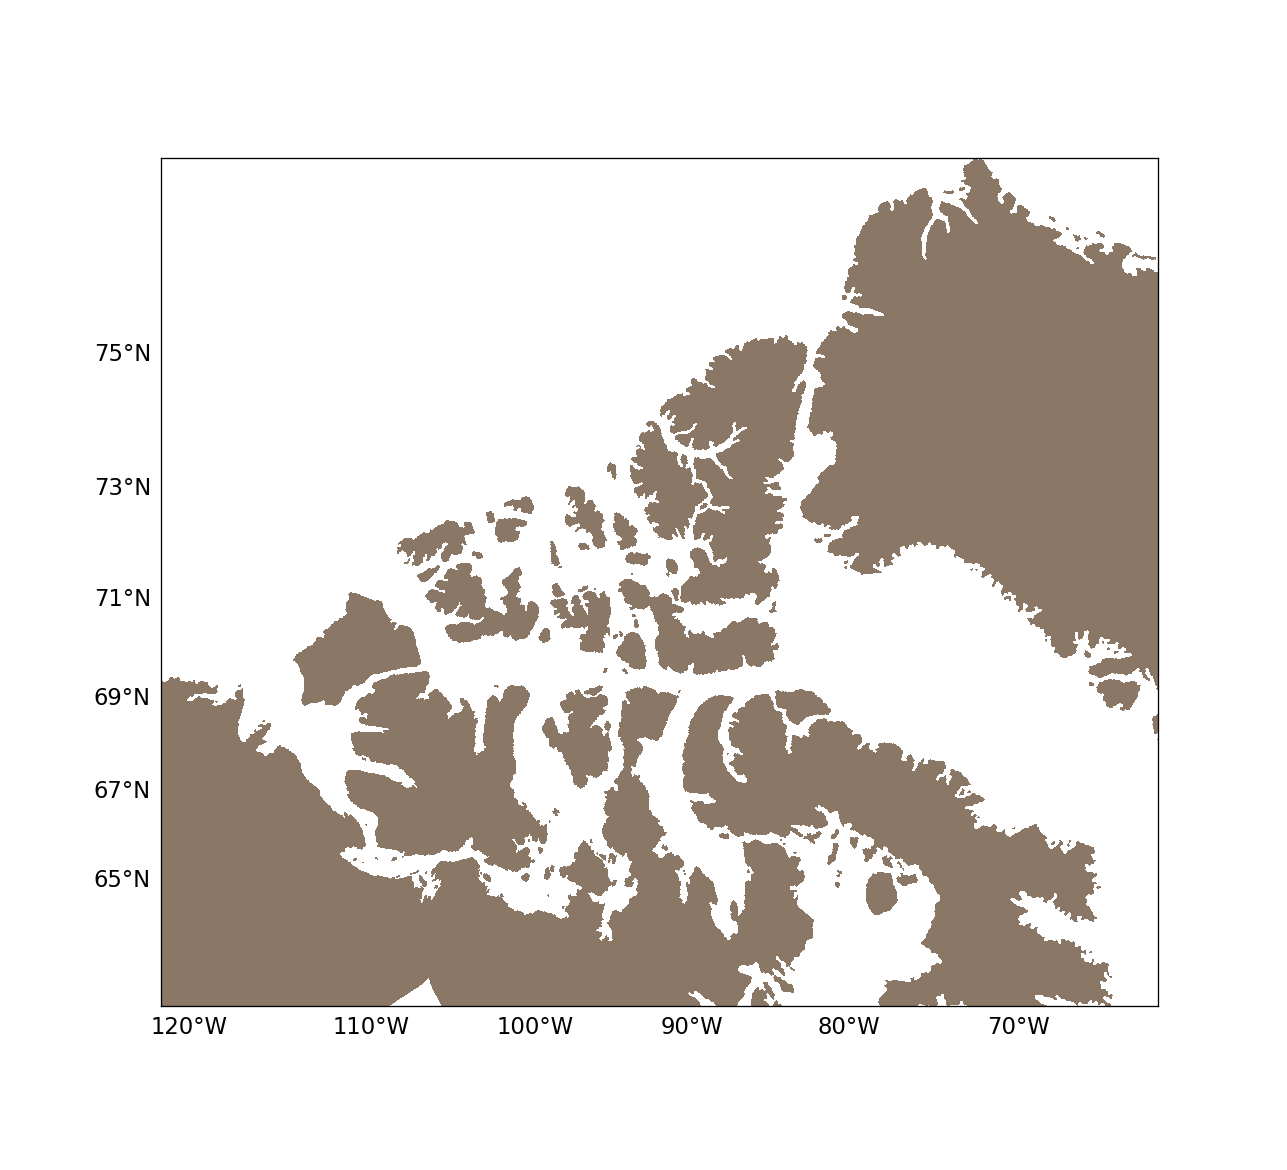

In [15]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

In [22]:
ave_change  = fix_ave - base_ave 
diff_change = fix_diff - base_diff

In [18]:
print(np.amax(base_ave), np.amin(base_ave), np.average(base_ave))
print(np.amax(enhanced_ave), np.amin(enhanced_ave), np.average(enhanced_ave))

6.6571704e-07 0.0 2.530411831196888e-09
9.972964e-07 0.0 2.5543975937666004e-09


<a id='dust'></a>

<IPython.core.display.Javascript object>


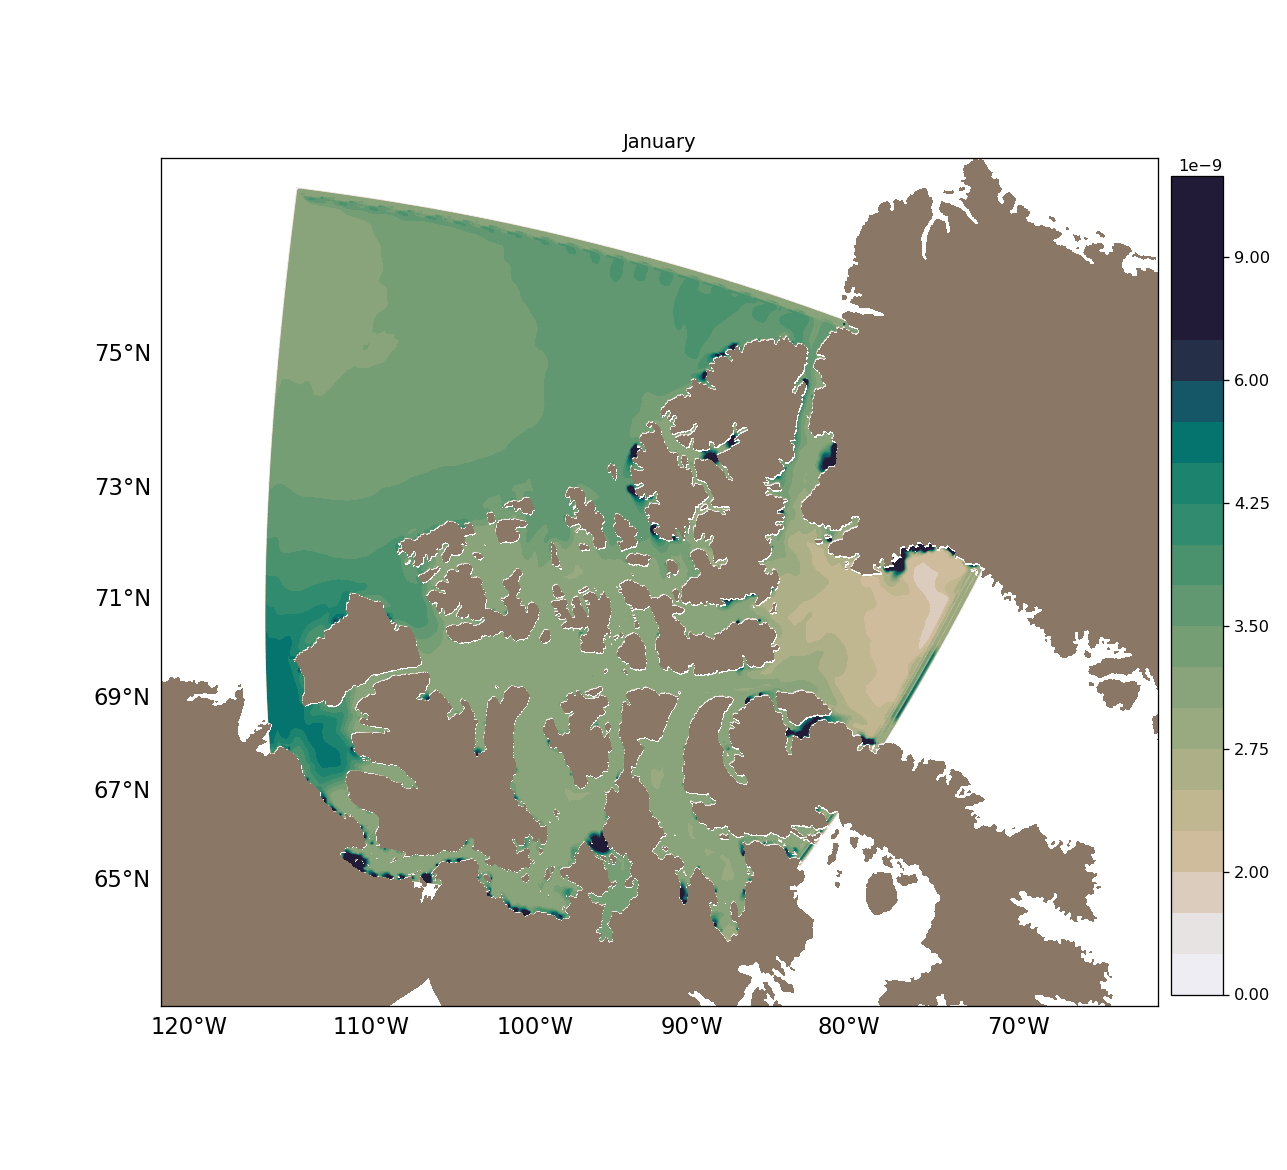

In [28]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [0, 1e-9, 1.5e-9, 2e-9, 2.25e-9, 2.5e-9, 2.75e-9, 3e-9, 3.25e-9, 3.5e-9,\
              3.75e-9, 4e-9, 4.25e-9, 4.5e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-8, 1e-7]
min_v  = 1e-9
max_v  = 7e-9
cbar = proj.contourf(x, y, base_ave[0,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('January')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


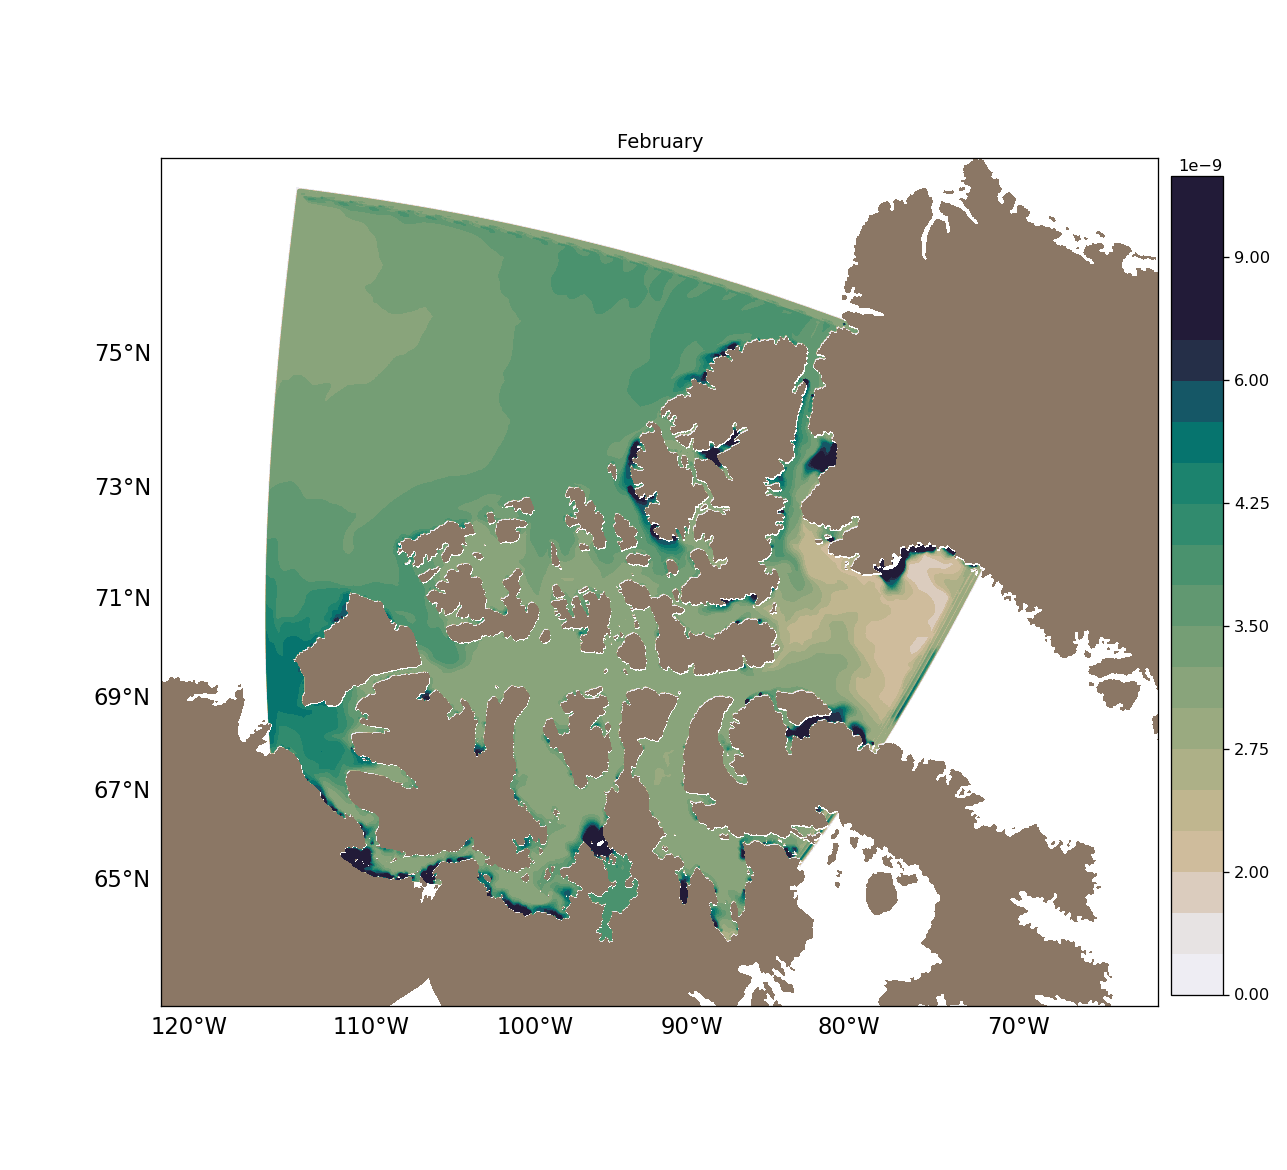

In [30]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [0, 1e-9, 1.5e-9, 2e-9, 2.25e-9, 2.5e-9, 2.75e-9, 3e-9, 3.25e-9, 3.5e-9,\
              3.75e-9, 4e-9, 4.25e-9, 4.5e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-8, 1e-7]
min_v  = 1e-9
max_v  = 7e-9
cbar = proj.contourf(x, y, base_ave[1,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('February')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


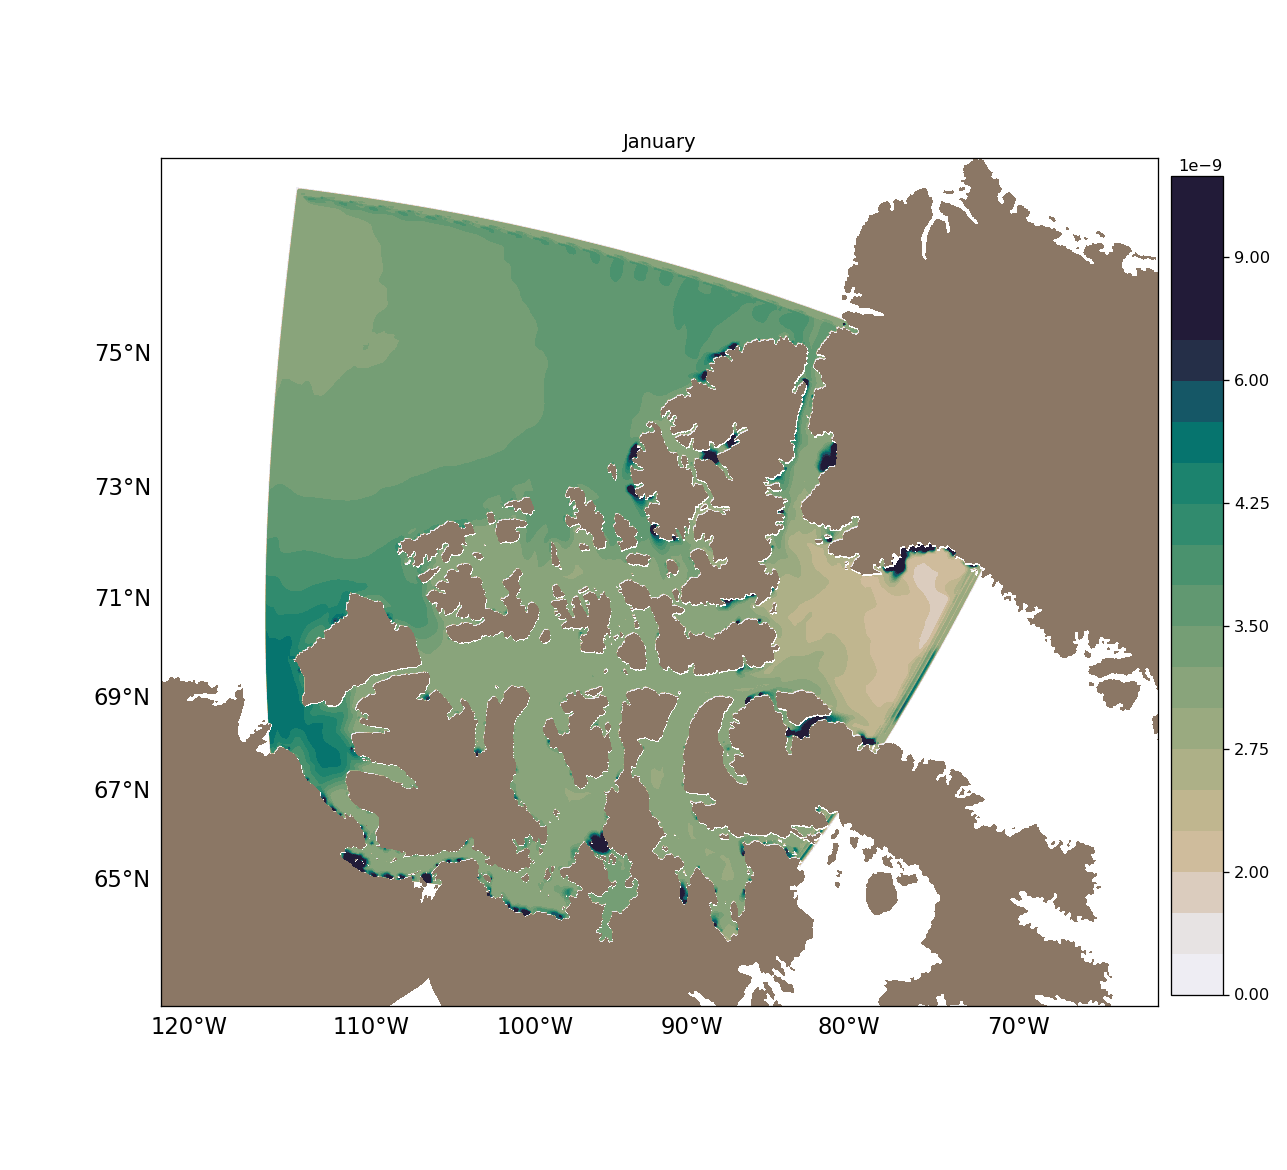

In [31]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [0, 1e-9, 1.5e-9, 2e-9, 2.25e-9, 2.5e-9, 2.75e-9, 3e-9, 3.25e-9, 3.5e-9,\
              3.75e-9, 4e-9, 4.25e-9, 4.5e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-8, 1e-7]
min_v  = 1e-9
max_v  = 7e-9
cbar = proj.contourf(x, y, enhanced_ave[0,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('January')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


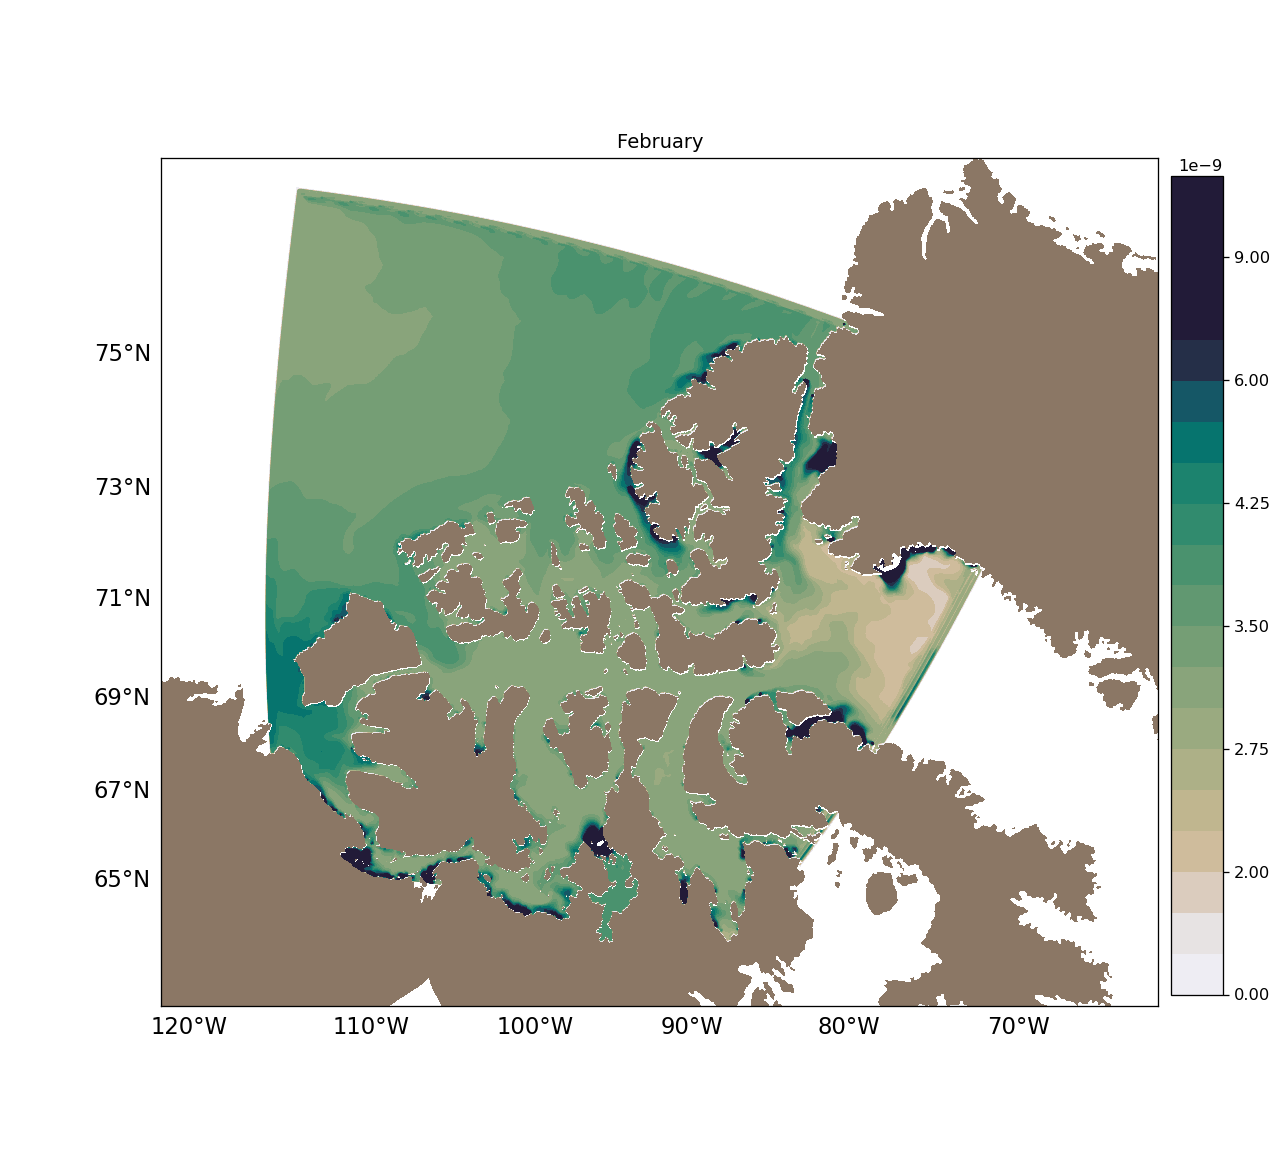

In [32]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [0, 1e-9, 1.5e-9, 2e-9, 2.25e-9, 2.5e-9, 2.75e-9, 3e-9, 3.25e-9, 3.5e-9,\
              3.75e-9, 4e-9, 4.25e-9, 4.5e-9, 5e-9, 6e-9, 7e-9, 8e-9, 9e-9, 1e-8, 1e-7]
min_v  = 1e-9
max_v  = 7e-9
cbar = proj.contourf(x, y, enhanced_ave[1,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('February')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

## Addition of tracers to glaciers:

In [33]:
ave_change = enhanced_ave - base_ave

In [34]:
print(np.amax(ave_change), np.amin(ave_change), np.average(ave_change))

3.3157937e-07 -1.67236e-10 2.3987150951402673e-11


In [72]:
glacial_mtm = ave_change[1,:,:,:] - ave_change[0,:,:,:]

In [73]:
print(np.amax(glacial_mtm), np.amin(glacial_mtm), np.average(glacial_mtm))

1.5232257e-07 -1.3215086e-08 2.2752834355297063e-11


<IPython.core.display.Javascript object>


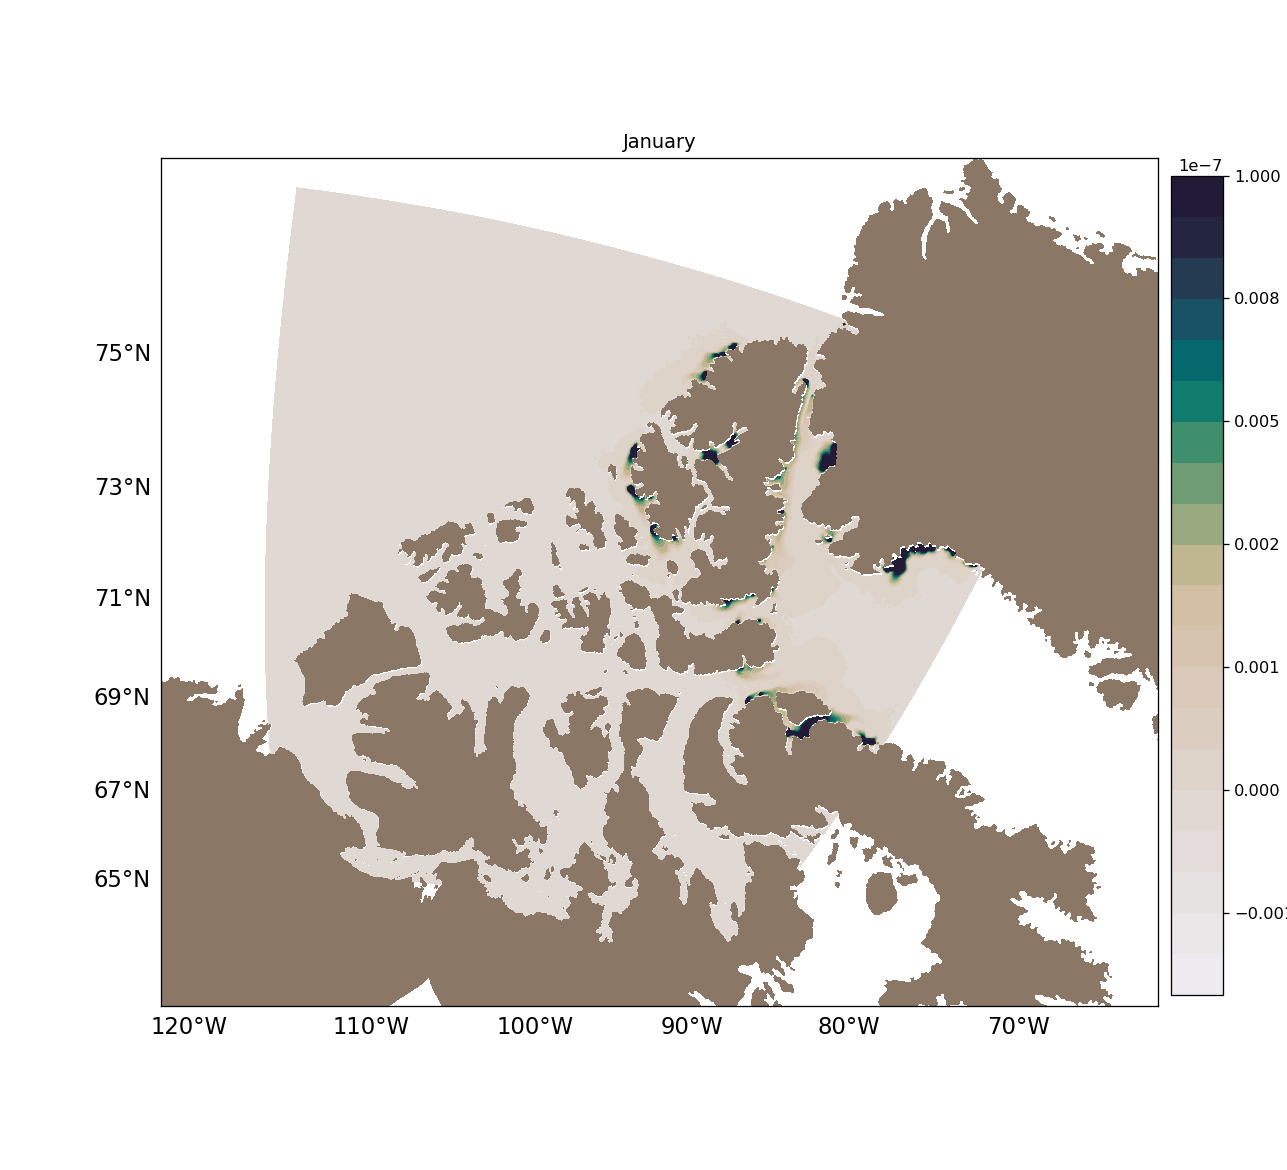

In [68]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [-1e-10, -8e-11, -6e-11, -4e-11, -2e-11, 0, 2e-11, 4e-11, 6e-11, 8e-11, \
              1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-9, 1e-7]
min_v  = -1e-10
max_v  = 10e-10
cbar = proj.contourf(x, y, ave_change[0,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('January')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

<IPython.core.display.Javascript object>


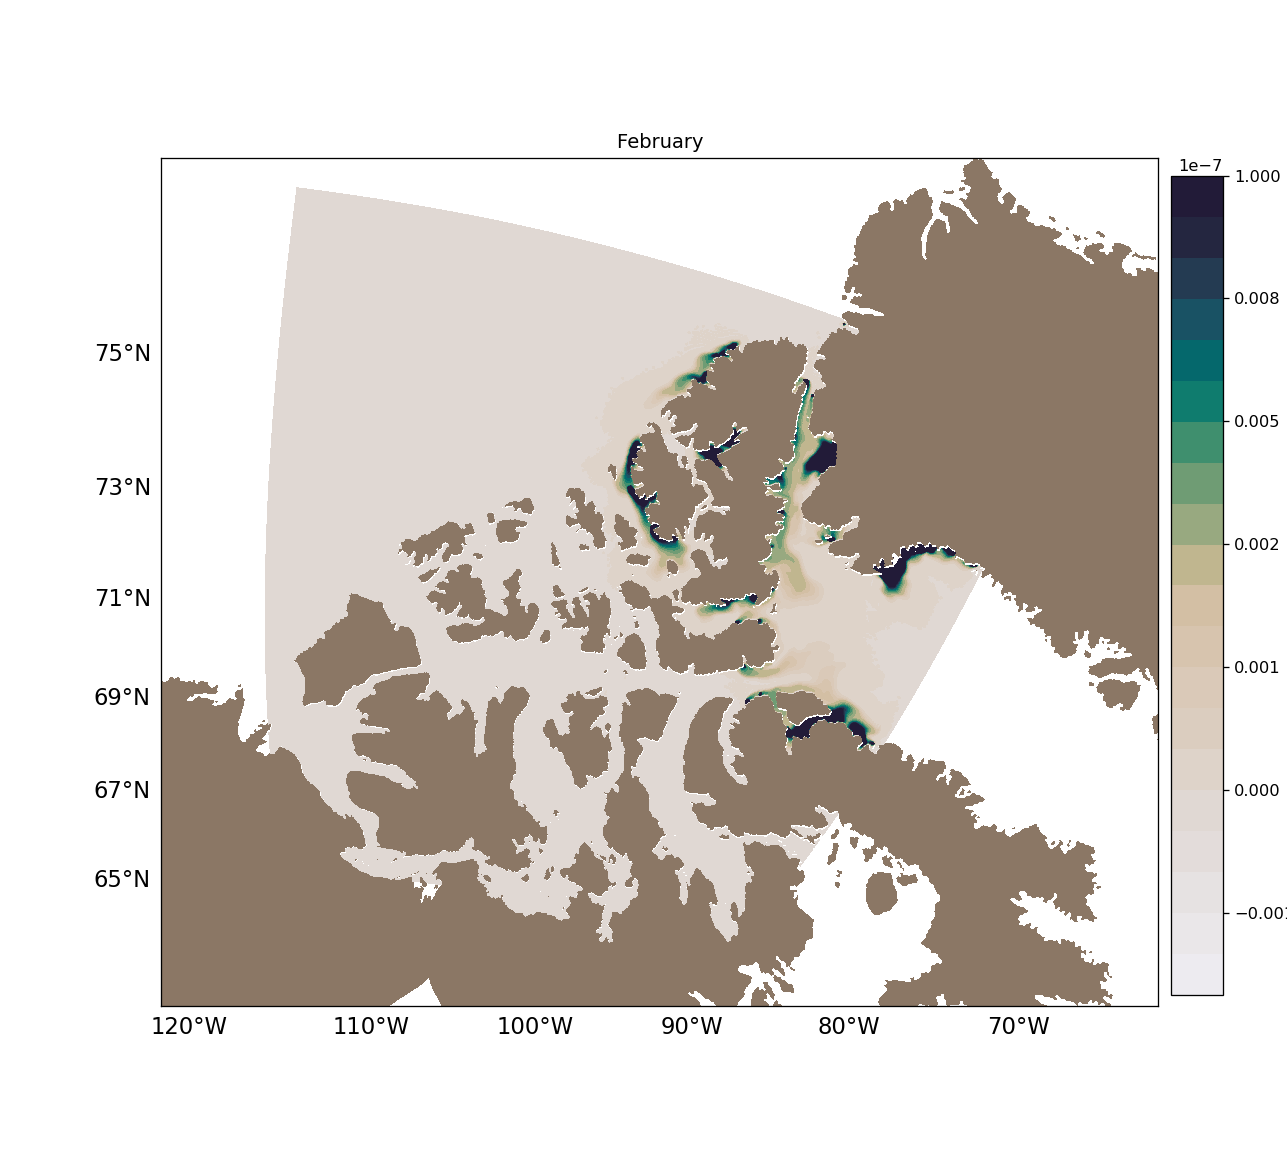

In [87]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.rain

levels_ave = [-1e-10, -8e-11, -6e-11, -4e-11, -2e-11, 0, 2e-11, 4e-11, 6e-11, 8e-11, \
              1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-9, 1e-7]
min_v  = -1e-10
max_v  = 10e-10
cbar = proj.contourf(x, y, ave_change[1,0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('February')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);

## Month-to-month change:

<IPython.core.display.Javascript object>


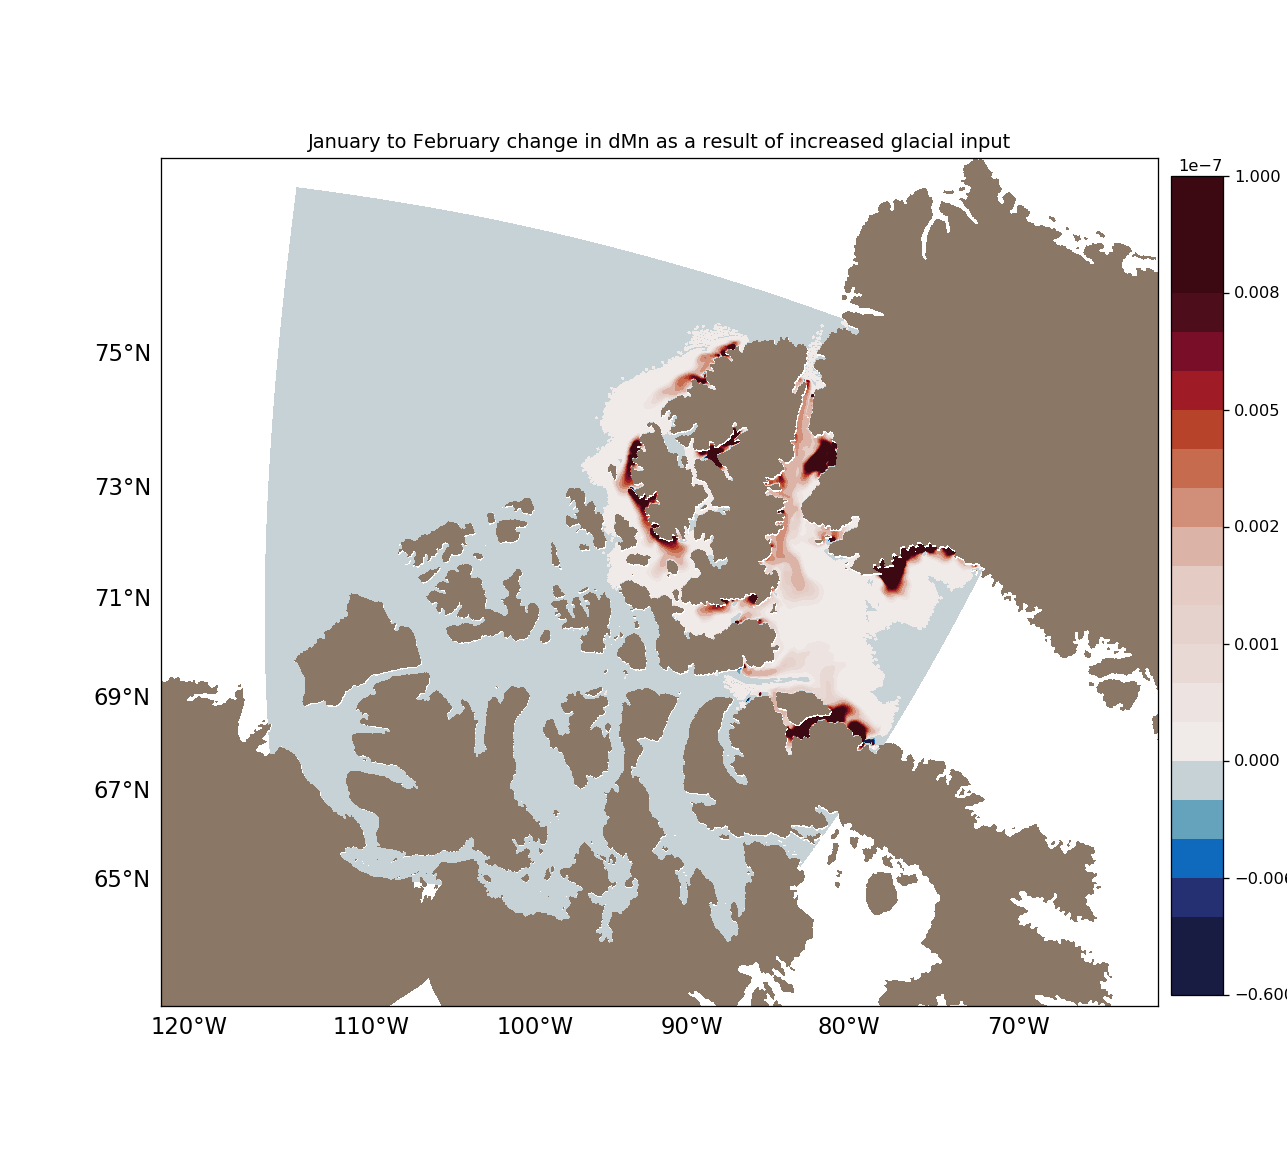

In [91]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Mn.pickle','rb'))

x, y = proj(lons, lats)
colour=cmocean.cm.balance

# levels_ave = [-1e-9, -1e-20, 0, 2e-11, 4e-11, 6e-11, 8e-11, \
#               1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-9, 1e-7]
# min_v  = -8e-10
# max_v  = 8e-10
levels_ave = [-6e-8, -1e-9, -8e-10, -6e-10, -4e-10, -2e-10, 0, 2e-11, 4e-11, 6e-11, 8e-11, \
              1e-10, 2e-10, 3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10, 9e-10, 1e-9, 1e-7]
min_v  = -8e-10
max_v  = 8e-10
cbar = proj.contourf(x, y, glacial_mtm[0,:,:], levels_ave, vmin=min_v, vmax=max_v, cmap=colour, )
plt.title('January to February change in dMn as a result of increased glacial input')
    
fig = gcf()
cbar_ax = fig.add_axes([0.91, 0.15, 0.04, 0.7])
fig.colorbar(cbar, cax=cbar_ax);